In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import spotipy.util as util
import json, os
import config

In [2]:
os.environ['SPOTIPY_CLIENT_ID']= config.CLIENT_ID
os.environ['SPOTIPY_CLIENT_SECRET']= config.CLIENT_SECRET
os.environ['SPOTIPY_REDIRECT_URI']='http://localhost:8081/callback'

In [3]:
username = config.USERNAME
scope = 'user-top-read'
token = util.prompt_for_user_token(username,scope)
sp = spotipy.Spotify(auth=token)

In [7]:
tracks = []
for j in range(1960,2023):
    for i in range(0,1000,50):
        try:
            results = sp.search(q='year:'+str(j), type='track', limit=50,offset=i) 
            tracks.extend(results['tracks']['items'])
        except:
            token = util.prompt_for_user_token(username,scope)
            sp = spotipy.Spotify(auth=token)

In [8]:
df_tracks = pd.DataFrame(tracks)
df_tracks['release_date'] = df_tracks['album'].apply(lambda x: x['release_date'])
df_tracks.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri,release_date
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,False,Chaudhvin Ka Chand Ho,39,https://p.scdn.co/mp3-preview/27570b0b2d10f42e...,1,track,spotify:track:4nEKA1qrppgDexxV25EvKs,1960-01-01
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,False,At Last,75,https://p.scdn.co/mp3-preview/ad80364f22bde644...,7,track,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,1960
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,315613,False,{'isrc': 'INH109832520'},{'spotify': 'https://open.spotify.com/track/6R...,https://api.spotify.com/v1/tracks/6Rl4eDKFpvnt...,6Rl4eDKFpvntiRKtPn8d5V,False,Ajib Dastan Hai Yeh,53,https://p.scdn.co/mp3-preview/90ee4e23e3641948...,7,track,spotify:track:6Rl4eDKFpvntiRKtPn8d5V,1960-01-01
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,280080,False,{'isrc': 'INH109350700'},{'spotify': 'https://open.spotify.com/track/4j...,https://api.spotify.com/v1/tracks/4jDfPSa6zoZ4...,4jDfPSa6zoZ4xGTSmyrg8i,False,Khoya Khoya Chand Khula Aasman,31,https://p.scdn.co/mp3-preview/e83541429168e45b...,8,track,spotify:track:4jDfPSa6zoZ4xGTSmyrg8i,1960-01-01
4,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,False,Dolayam,31,https://p.scdn.co/mp3-preview/9d7730f47a358f24...,5,track,spotify:track:7pCiEvG73gNjyq6UdIUDYE,1960-04-08


In [61]:
df_audio_features = pd.DataFrame(columns=list(sp.audio_features(df_tracks['id'].values[:1])[0].keys()))
for i in range(0,len(df_tracks),100):
    try:
        df_audio_features = pd.concat([df_audio_features,pd.DataFrame(sp.audio_features(df_tracks.loc[i:i+99,'id'].values))],ignore_index=True)
    except:
        pass

In [62]:
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.274,0.348,5,-8.631,1,0.0293,0.547,0.013300,0.3340,0.328,87.430,audio_features,4Hhv2vrOTy89HFRcjU3QOx,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693,3
1,0.524,0.280,7,-7.078,1,0.0289,0.899,0.000000,0.1440,0.525,97.691,audio_features,4nEKA1qrppgDexxV25EvKs,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507,4
2,0.397,0.560,0,-7.536,1,0.1260,0.898,0.000003,0.6030,0.697,171.294,audio_features,7pCiEvG73gNjyq6UdIUDYE,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360,4
3,0.454,0.388,1,-17.274,1,0.0455,0.919,0.001060,0.0806,0.672,112.476,audio_features,1xjO1qiSWdRoK4TXIR6PeJ,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013,4
4,0.542,0.280,2,-14.974,1,0.0367,0.980,0.588000,0.1130,0.711,115.920,audio_features,5o4crBlWt8lQnLMfPmkzQS,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52795,0.696,0.401,2,-10.822,1,0.0469,0.311,0.005210,0.0463,0.944,96.475,audio_features,3V29kIVkcNchC5ydvY0ZyR,spotify:track:3V29kIVkcNchC5ydvY0ZyR,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,https://api.spotify.com/v1/audio-analysis/3V29...,188944,4
52796,0.884,0.481,3,-9.328,0,0.0593,0.127,0.221000,0.0682,0.898,141.495,audio_features,5WxUaPf2AOxBcJ2nA7awdN,spotify:track:5WxUaPf2AOxBcJ2nA7awdN,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,https://api.spotify.com/v1/audio-analysis/5WxU...,279261,4
52797,0.589,0.768,11,-7.164,0,0.0662,0.648,0.000000,0.0823,0.810,152.006,audio_features,1Ya1UL2b1s4GOHzzfyE5fv,spotify:track:1Ya1UL2b1s4GOHzzfyE5fv,https://api.spotify.com/v1/tracks/1Ya1UL2b1s4G...,https://api.spotify.com/v1/audio-analysis/1Ya1...,205640,4
52798,0.795,0.603,4,-7.446,1,0.0315,0.407,0.007310,0.0898,0.938,102.040,audio_features,6MYyzyA2ePAvrELcaA5qHG,spotify:track:6MYyzyA2ePAvrELcaA5qHG,https://api.spotify.com/v1/tracks/6MYyzyA2ePAv...,https://api.spotify.com/v1/audio-analysis/6MYy...,239827,4


In [67]:
df = df_tracks.merge(df_audio_features,on='id',how='left')
df

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,0.013300,0.3340,0.328,87.430,audio_features,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693,3
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,0.000000,0.1440,0.525,97.691,audio_features,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507,4
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,0.000003,0.6030,0.697,171.294,audio_features,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360,4
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,0.001060,0.0806,0.672,112.476,audio_features,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013,4
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,0.588000,0.1130,0.711,115.920,audio_features,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,188943,False,{'isrc': 'USJ3V1204541'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,3V29kIVkcNchC5ydvY0ZyR,...,0.005210,0.0463,0.944,96.475,audio_features,spotify:track:3V29kIVkcNchC5ydvY0ZyR,https://api.spotify.com/v1/tracks/3V29kIVkcNch...,https://api.spotify.com/v1/audio-analysis/3V29...,188944,4
52996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,279261,False,{'isrc': 'MYAG11100357'},{'spotify': 'https://open.spotify.com/track/5W...,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,5WxUaPf2AOxBcJ2nA7awdN,...,0.221000,0.0682,0.898,141.495,audio_features,spotify:track:5WxUaPf2AOxBcJ2nA7awdN,https://api.spotify.com/v1/tracks/5WxUaPf2AOxB...,https://api.spotify.com/v1/audio-analysis/5WxU...,279261,4
52997,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,205640,False,{'isrc': 'TCABH1216565'},{'spotify': 'https://open.spotify.com/track/1Y...,https://api.spotify.com/v1/tracks/

In [123]:
for i,val in df[df.danceability.isnull()].iterrows():
    try:
        obj = sp.audio_features(df.loc[i,'id'])[0]
        del obj['id']
        df.loc[i,df.columns[len(df_tracks.columns):]] = list(obj.values())
    except:
        pass
df[df.danceability.isnull()]

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
9492,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,131998,False,{'isrc': 'GX5MX2169095'},{'spotify': 'https://open.spotify.com/track/2P...,https://api.spotify.com/v1/tracks/2PJGgRTVLRGG...,2PJGgRTVLRGG2LgrrdtDie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['year'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))
df

,album,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,type,uri,duration_ms,year
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,audio_features,spotify:track:4Hhv2vrOTy89HFRcjU3QOx,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,179693.0,3.0,NaN,NaN,NaN,1960
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,audio_features,spotify:track:4nEKA1qrppgDexxV25EvKs,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,223507.0,4.0,NaN,NaN,NaN,1960
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,audio_features,spotify:track:7pCiEvG73gNjyq6UdIUDYE,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,163360.0,4.0,NaN,NaN,NaN,1960
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,audio_features,spotify:track:1xjO1qiSWdRoK4TXIR6PeJ,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,423013.0,4.0,NaN,NaN,NaN,1960
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,audio_features,spotify:track:5o4crBlWt8lQnLMfPmkzQS,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,169933.0,3.0,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,193374,False,{'isrc': 'FR2X42203488'},{'spotify': 'https://open.spotify.com/track/04...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,046srpP68Vu1evgrTPEQOU,...,NaN,NaN,https://api.spotify.com/v1/tracks/046srpP68Vu1...,https://api.spotify.com/v1/audio-analysis/046s...,NaN,4.0,audio_features,spotify:track:046srpP68Vu1evgrTPEQOU,193375.0,2022
9995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,185857,True,{'isrc': 'USUM72208020'},{'spotify': 'https://open.spotify.com/track/3Z...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,3Z7HBhF9LfOgMWNwk5tCsS,...,NaN,NaN,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,https://api.spotify.com/v1/audio-analysis/3Z7H...,NaN,4.0,audio_features,spotify:track:3Z7HBhF9LfOgMWNwk5tCsS,185857.0,2022
9996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,193506,True,{'isrc': 'USUM72120404'},{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,0898kA1lLwX1YFKPSDwDUa,...,NaN,NaN,https://api.spotify.

In [33]:
df.isnull().sum()

album                    0
artists                  0
available_markets        0
disc_number              0
duration_ms_x            0
explicit                 0
external_ids             0
external_urls            0
href                     0
id                       0
is_local                 0
name                    11
popularity               0
preview_url              2
track_number             0
type_x                   0
uri_x                    0
release_date             0
danceability             3
energy                   3
key                      3
loudness                 3
mode                     3
speechiness              3
acousticness             3
instrumentalness         3
liveness                 3
valence                  3
tempo                    3
type_y               10000
uri_y                10000
track_href               3
analysis_url             3
duration_ms_y        10000
time_signature           3
type                 53002
uri                  53002
d

In [34]:
df.drop(columns=['type','uri','duration_ms','type_y','uri_y','duration_ms_y'],inplace=True)
df.rename(columns={'type_x':'type','uri_x':'uri','duration_ms_x':'duration_ms'},inplace=True)
df

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,time_signature,year
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,0.0293,0.5470,0.013300,0.3340,0.328,87.430,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,3.0,1960
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,0.0289,0.8990,0.000000,0.1440,0.525,97.691,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,4.0,1960
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,0.1260,0.8980,0.000003,0.6030,0.697,171.294,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,4.0,1960
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,0.0455,0.9190,0.001060,0.0806,0.672,112.476,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,4.0,1960
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,['IN'],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,0.0367,0.9800,0.588000,0.1130,0.711,115.920,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,3.0,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,193374,False,{'isrc': 'FR2X42203488'},{'spotify': 'https://open.spotify.com/track/04...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,046srpP68Vu1evgrTPEQOU,...,0.0303,0.4120,0.000000,0.1090,0.453,149.884,https://api.spotify.com/v1/tracks/046srpP68Vu1...,https://api.spotify.com/v1/audio-analysis/046s...,4.0,2022
9995,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,185857,True,{'isrc': 'USUM72208020'},{'spotify': 'https://open.spotify.com/track/3Z...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,3Z7HBhF9LfOgMWNwk5tCsS,...,0.1530,0.0380,0.000000,0.1130,0.377,93.923,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,https://api.spotify.com/v1/audio-analysis/3Z7H...,4.0,2022
9996,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AL', 'AR', 'AT', 'AU', 'BA', 'BE', 'BG...",1,193506,True,{'isrc': 'USUM72120404'},{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,0898kA1lLwX1YFKPSDwDUa,...,0.0530,0.0361,0.000000,0.0755,0.688,97.014,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,https://api.spotify.com/v1/audio-analysis/0898...,4.0,2022
9997,"{'album_type': 'single', 'artists': [{'externa...",[{'externa

In [11]:
df.dropna(inplace=True)

In [96]:
df['album_name'] = df['album'].apply(lambda x: x['name'])
df['artists_name'] = df['artists'].apply(lambda x: x[0]['name'] if len(x)==1 else [i['name'] for i in x])
df['no_of_artists'] = df['artists'].apply(lambda x: len(x))

In [ ]:
# df.to_csv('Spotify_1960_to_2022.csv')
# df = pd.read_csv('Spotify_1960_to_2022.csv',index_col=0)
# import ast
# obj_cols = ['album','artists','available_markets','external_ids','external_urls']
# for i in obj_cols:
#     df[i] = df[i].apply(lambda x: ast.literal_eval(x))

# Analysis

In [21]:
audio_feat_cols = df.columns[18:29]
audio_feat_cols

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [23]:
%%time
year = [1960,1980,2000,2023]
mean_by_yr_partitioned = pd.DataFrame(columns=audio_feat_cols)
for i in range(len(year)-1):
    mean_by_yr_partitioned = pd.concat([mean_by_yr_partitioned,df[(df['year']>year[i]) & (df['year']<year[i+1])][audio_feat_cols].mean().to_frame().T])

CPU times: user 104 ms, sys: 12.1 ms, total: 116 ms
Wall time: 114 ms


In [24]:
years = ['1960-1979','1980-1999','2000-2022']
mean_by_yr_partitioned.insert(0,'years',years)

In [26]:
mean_by_yr = df.groupby(['year'])[audio_feat_cols].mean()
mean_by_yr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,,,,,,,,,,,
1960,0.507707,0.389695,5.059059,-12.004199,0.719720,0.074389,0.785713,0.174164,0.219959,0.612741,113.841166
1961,0.500849,0.398111,4.931932,-12.186053,0.713714,0.069084,0.780294,0.198011,0.225450,0.606733,114.317919
1962,0.495651,0.391213,5.263000,-11.975397,0.710000,0.072529,0.793116,0.167527,0.220645,0.606789,115.944643
1963,0.499725,0.392508,5.187000,-12.129115,0.734000,0.059993,0.793825,0.166369,0.226781,0.621881,115.172024
1964,0.493449,0.406681,5.139000,-11.603606,0.702000,0.061081,0.790348,0.162585,0.229858,0.611342,115.097638
...,...,...,...,...,...,...,...,...,...,...,...
2018,0.629339,0.633406,5.276000,-6.819686,0.505000,0.088092,0.359780,0.024739,0.173364,0.479097,119.639367
2019,0.636093,0.629977,5.258000,-6.706410,0.531000,0.090613,0.362427,0.026119,0.170736,0.500828,118.462496
2020,0.655014,0.612785,5.243487,-7.004906,0.501002,0.101477,0.360895,0.016484,0.170852,0.494139,117.084759


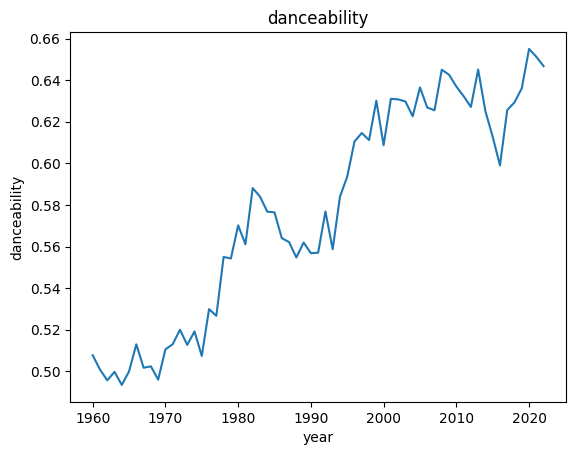

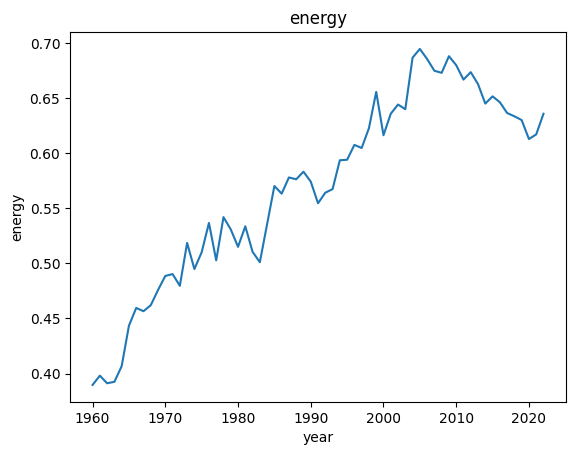

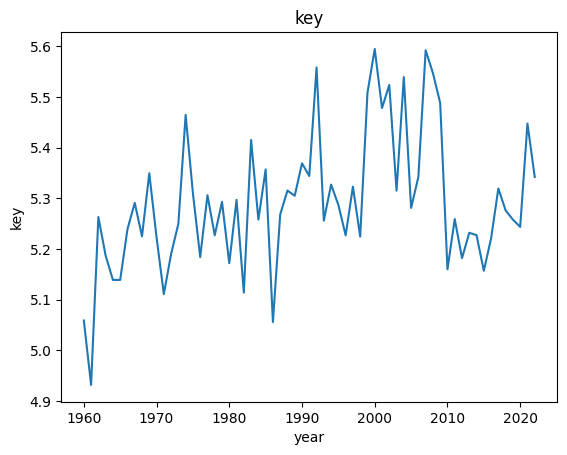

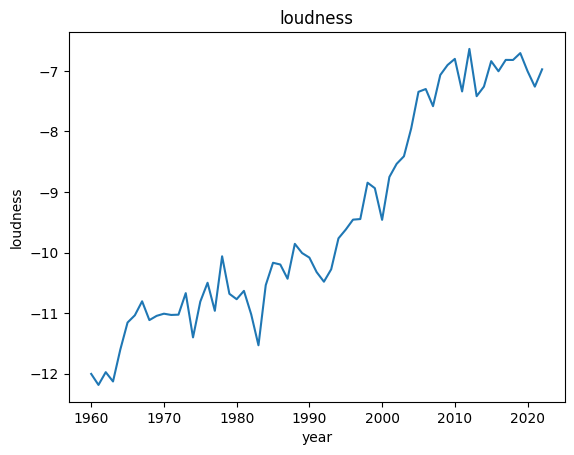

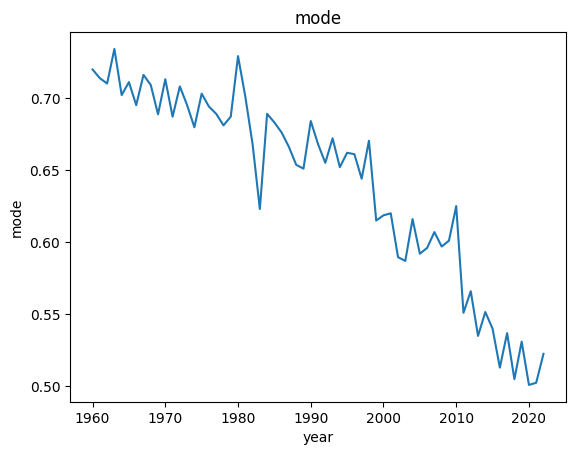

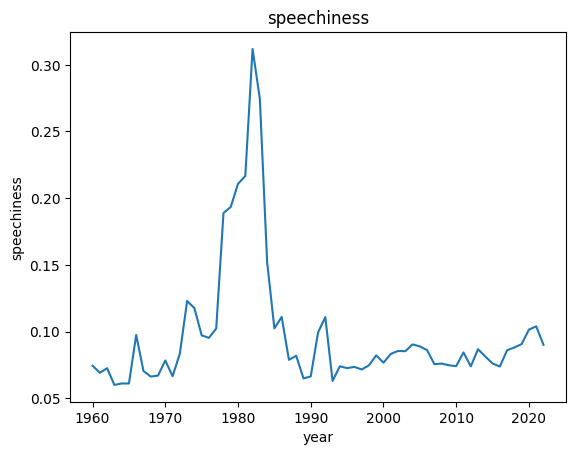

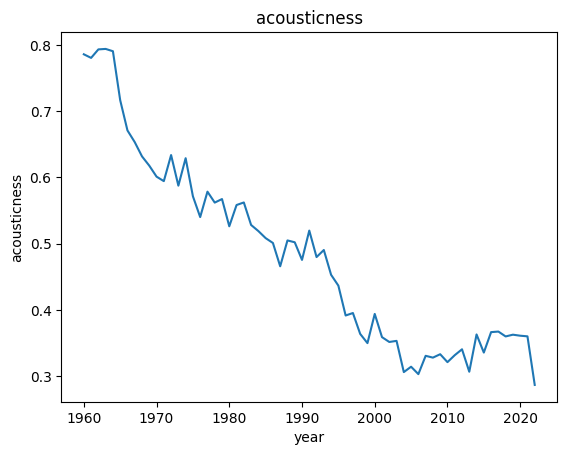

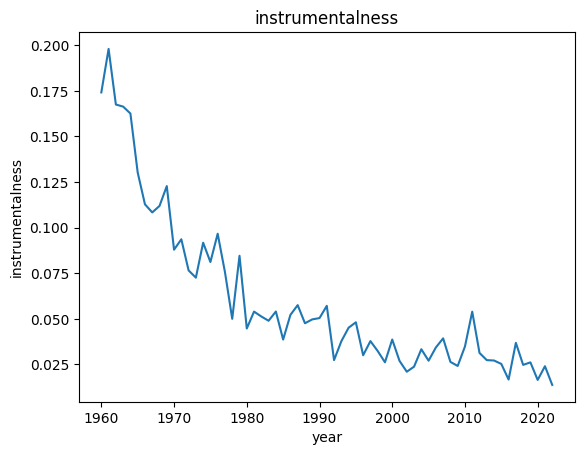

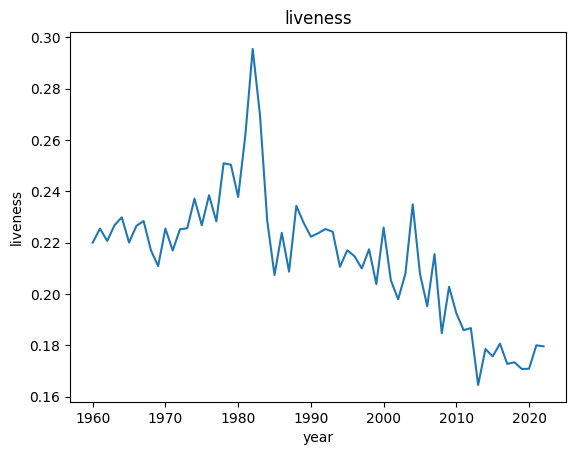

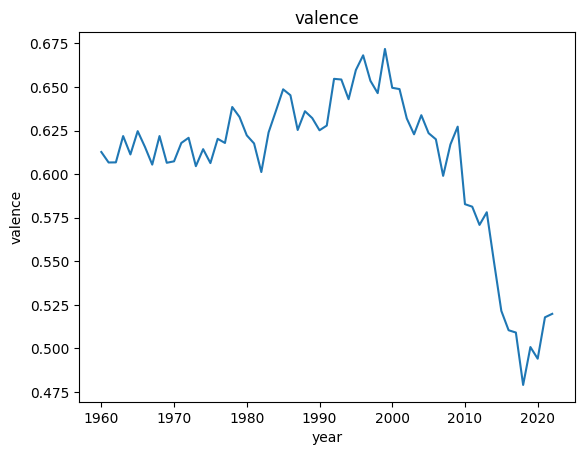

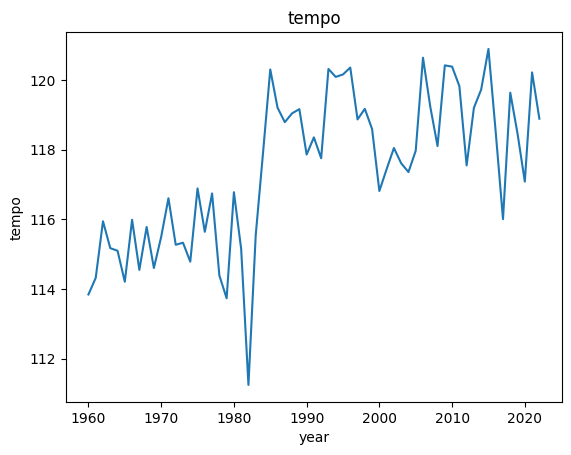

In [28]:
for i in mean_by_yr.columns:
    sns.lineplot(data=mean_by_yr,x='year',y=i).set(title=i)
    plt.show()

In [134]:
mean_by_yr['key'] = df.groupby(['year'])['key'].agg(lambda x: int(pd.Series.mode(x)[0]))
mean_by_yr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
year,,,,,,,,,,,
1960,0.507707,0.389695,0,-12.004199,0.719720,0.074389,0.785713,0.174164,0.219959,0.612741,113.841166
1961,0.500849,0.398111,7,-12.186053,0.713714,0.069084,0.780294,0.198011,0.225450,0.606733,114.317919
1962,0.495651,0.391213,5,-11.975397,0.710000,0.072529,0.793116,0.167527,0.220645,0.606789,115.944643
1963,0.499725,0.392508,0,-12.129115,0.734000,0.059993,0.793825,0.166369,0.226781,0.621881,115.172024
1964,0.493449,0.406681,5,-11.603606,0.702000,0.061081,0.790348,0.162585,0.229858,0.611342,115.097638
...,...,...,...,...,...,...,...,...,...,...,...
2018,0.629339,0.633406,4,-6.819686,0.505000,0.088092,0.359780,0.024739,0.173364,0.479097,119.639367
2019,0.636093,0.629977,0,-6.706410,0.531000,0.090613,0.362427,0.026119,0.170736,0.500828,118.462496
2020,0.655014,0.612785,1,-7.004906,0.501002,0.101477,0.360895,0.016484,0.170852,0.494139,117.084759


In [39]:
df['album_type'] = df['album'].apply(lambda x: x['album_type'])
df['album_total_tracks'] = df['album'].apply(lambda x: x['total_tracks'])
df['number_of_available_markets'] = df['available_markets'].apply(lambda x: len(x))
df

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,...,track_href,analysis_url,time_signature,year,album_name,artists_name,no_of_artists,album_type,album_total_tracks,number_of_available_markets
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,179693,False,{'isrc': 'USMC16046323'},{'spotify': 'https://open.spotify.com/track/4H...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,4Hhv2vrOTy89HFRcjU3QOx,...,https://api.spotify.com/v1/tracks/4Hhv2vrOTy89...,https://api.spotify.com/v1/audio-analysis/4Hhv...,3.0,1960,At Last!,Etta James,1,album,14,183
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,223506,False,{'isrc': 'INH109238940'},{'spotify': 'https://open.spotify.com/track/4n...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,4nEKA1qrppgDexxV25EvKs,...,https://api.spotify.com/v1/tracks/4nEKA1qrppgD...,https://api.spotify.com/v1/audio-analysis/4nEK...,4.0,1960,Chaudhvin Ka Chand,Mohammed Rafi,1,album,10,1
2,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,163360,False,{'isrc': 'INH100305220'},{'spotify': 'https://open.spotify.com/track/7p...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,7pCiEvG73gNjyq6UdIUDYE,...,https://api.spotify.com/v1/tracks/7pCiEvG73gNj...,https://api.spotify.com/v1/audio-analysis/7pCi...,4.0,1960,"Balaji Pancharatnamala - M.S. Subbulakshmi,Vol. 1","['M. S. Subbulakshmi', 'Radha Viswanathan']",2,compilation,6,1
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,423013,False,{'isrc': 'INH100407396'},{'spotify': 'https://open.spotify.com/track/1x...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,1xjO1qiSWdRoK4TXIR6PeJ,...,https://api.spotify.com/v1/tracks/1xjO1qiSWdRo...,https://api.spotify.com/v1/audio-analysis/1xjO...,4.0,1960,"Mahagayak Bhag,Vol. 1",Bhimsen Joshi,1,single,4,1
4,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[IN],1,169933,False,{'isrc': 'INH100367800'},{'spotify': 'https://open.spotify.com/track/5o...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,5o4crBlWt8lQnLMfPmkzQS,...,https://api.spotify.com/v1/tracks/5o4crBlWt8lQ...,https://api.spotify.com/v1/audio-analysis/5o4c...,3.0,1960,Shes Parjyanta,Hemant Kumar,1,single,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62978,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,193374,False,{'isrc': 'FR2X42203488'},{'spotify': 'https://open.spotify.com/track/04...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,046srpP68Vu1evgrTPEQOU,...,https://api.spotify.com/v1/tracks/046srpP68Vu1...,https://api.spotify.com/v1/audio-analysis/046s...,4.0,2022,Dreams Unfold,Prem Dhillon,1,single,1,183
62979,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, C...",1,185857,True,{'isrc': 'USUM72208020'},{'spotify': 'https://open.spotify.com/track/3Z...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,3Z7HBhF9LfOgMWNwk5tCsS,...,https://api.spotify.com/v1/tracks/3Z7HBhF9LfOg...,https://api.spotify.com/v1/audio-analysis/3Z7H...,4.0,2022,Top Trending Romania - Vara 2022,"['Post Malone', 'Roddy Ricch']",2,album,100,95
62980,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, C...",1,193506,True,{'isrc': 'USUM72120404'},{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,0898kA1lLwX1YFKPSDwDUa,...,https://api.spotify.com/v1/tracks/0898kA1lLwX1...,https://api.spotify.com/v1/audio-ana

In [95]:
import plotly.graph_objects as go
import plotly.offline as pyo

categories = list(audio_feat_cols[:2])+list(audio_feat_cols[5:-1])
categories = [*categories, categories[0]]
most_popular = df.loc[df['popularity']>95,categories].mean().values
all_tracks = df[categories].mean().values

fig = go.Figure(
    data=[
        go.Scatterpolar(r=most_popular, theta=categories,fill='toself', name='Most Popular'),
        go.Scatterpolar(r=all_tracks, theta=categories, fill='toself', name='All Tracks')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Audio Features comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)
# pyo.plot(fig)

In [84]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df[audio_feat_cols]),columns=audio_feat_cols)
# scaled_df['popularity'] = df['popularity']